# Social Data Analysis and Visualisation: COVID-19 Visualisation Project: Explainer Notebook

## 1. Motivation

#### What is your dataset?
In this project, data has been drawn upon from several sources to create a cohesive story about the impact of government responses and indicators on the coronavirus pandemic. Various aspects of these datasets were combined to create different visualisations that tell a story. The following datasets were utilised:
* Historical case data provided by the John Hopkins University
* A series of political and economic indicators taken from the World Bank data archives
* Dataset of government responses compiled by ACAPS
* Stringency measures dataset calculated and collected by Oxford University

#### Why did you choose this/these particular dataset(s)?
These particular datasets were chosen to give variety to the data used in this project. The John Hopkins University Coronavirus Resource Centre is a reliable source for up to date and accurate coronavirus case data. The dataset not only contains information about the number of coronavirus cases per country but, also contains information for different locations within each country, for example, data for each of the major cities in Australia. The dataset from the John Hopkins University Coronavirus Resource Centre also contains latitude and longitude information which, will be utilised in a heat map movie visualisation. Instances of NaN values in the data are minimal, which, is essential to ensure accurate and up to date data. The world bank data archives contain a plethora of data. The variety of government indicators allows for exciting stories to be crafted and links between different indicators and the number of coronavirus cases to be drawn upon. The data comes from a reliable source, and data can be obtained for every country.

The government response data from ACAPS contains information about the different government responses to the coronavirus pandemic. However, most importantly, the dataset includes information on the dates that different measures were introduced. This is the point of difference that we were looking for in a dataset. By providing the dates different measures were introduced, we can explore the timing of the introduction of government responses, with the increase of coronavirus cases. Finally, the stringency measure dataset was a later addition to the project. While the government response dataset from ACAPS provides valuable information, it only contains qualitative data about government measures. In comparison, the Oxford University dataset quantifies the government responses to the pandemic in a 'stringency index' calculated variable. This information adds excellent value to the project as we can now look at how the severity of the government measures changes over time and with the increase/decrease of coronavirus cases. 

#### What was your goal for the end user's experience?
The goal of the project was to present a cohesive and informative story about the effect of the government responses and indicators on the coronavirus pandemic. We wanted to ensure that no previous knowledge was required and all information that is necessary to understand the story was provided on the website and visualisations. Throughout the development of the project, the three keys elements of successful visualisations, (1) overview first, (2) zoom and filter, (3) details on demand were kept forefront. 

Firstly, the user is given an overview of the current pandemic situation. The user is introduced to the story that the visualisations are hoping to tell. The idea of the introduction is to ensure that all information and trends are presented clearly and require little user input; this comes later. We wanted to ensure that all users had a clear understanding of the story before beginning to filter and zoom into the finer points of the story and datasets. 

After the introduction, we begin to filter the data and present more specific visualisations. Most of the visualisations from this point on are interactive only for the point that all users will understand and take in information differently. We do not want to overwhelm users by presenting all of the information at once. First, we want to reveal small pieces of data over time and link the user's understanding of each visualisation together by providing small explanatory discussions throughout the website. Understandably, different visualisations will speak to/click with different users. This is where the details on-demand element of successful visualisations are utilised. For users who are not interested in a specific visualisation, they can view the static visualisation, take in minimal information and move on. However, for the more interested user, they can interact with the plot to reveal details on demand and more information. What is essential to note, though, is that the details that are revealed on request while interesting and informative are not required to successfully progress through the website and gain a general understanding of the story. Rather, these pieces of information are there to enhance and provide more depth to a users understanding. 

Overall, we want the user to enjoy exploring the website in their own way and to take away information that is of greatest interest to them. 

## 2. Basic Statistics

#### Write about your choices in data cleaning and pre-processing
The cleaning and pre-processing were similar for all four datasets. It comprised mainly the following steps:

- Ensure correct parsing of dates and numbers for different formattings.
- Cleaning of column titles for easy handling in Python.
- Standardisation of country codes for easy merging across datasets. This was done in large part thanks to the python package 'country_converter'.
- For the world bank datasets, merging them into one cohesive dataset that contained all the indicators we thought might be interesting.
 
We also wrote some scripts that automated this pre-processing and allowed automatic download and re-processing of the latest data, so that our visualisations could be kept up-to-date throughout the project as the pandemic continued to evolve.

#### Write a short section that discusses the dataset stats, containing key points/plots from your exploratory data analysis.
The following three plots show the basic statistics of the historical case data provided by the John Hopkins University and the socio-economic indicators taken from the World Bank data archives. Because the information provided in the ACAPS dataset is so varied and, is qualitative data, there are no basic statistics that can be provided. 

### Basic Statistics Plots

#### Initialisation

In [1]:
# import relevant packages
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import folium
from folium import plugins
from folium.plugins import HeatMapWithTime, MarkerCluster, HeatMap

In [2]:
# load in the datasets
df = pd.read_csv("cases_by_day.csv",index_col=0)
df2 = pd.read_csv("deaths_by_day.csv",index_col=0)
df3 = pd.read_csv("recovered_by_day.csv",index_col=0)

In [3]:
# set global plot style
sns.set(style='ticks', palette='muted', color_codes=True)

#### Basic Plot of Cases, Deaths and Recovered COVID-19 Patients Over Time

The basic statistics plot showing the number of COVID-19 cases, deaths and recovered patients was a crucial introduction to the dataset. We were able to visualise the date range of the dataset and the exponential and logarithmic evolution of the number of cases. This visualisation confirmed reports of the exponential growth of the pandemic but also the rapidity of the evolution after the first cases were confirmed. This visualisation proved a great introduction to the story, and therefore, it was decided to include this visualisation in the introductory sections of the website. Further information as to why this decision was made is included in section 5 of this explainer notebook. 

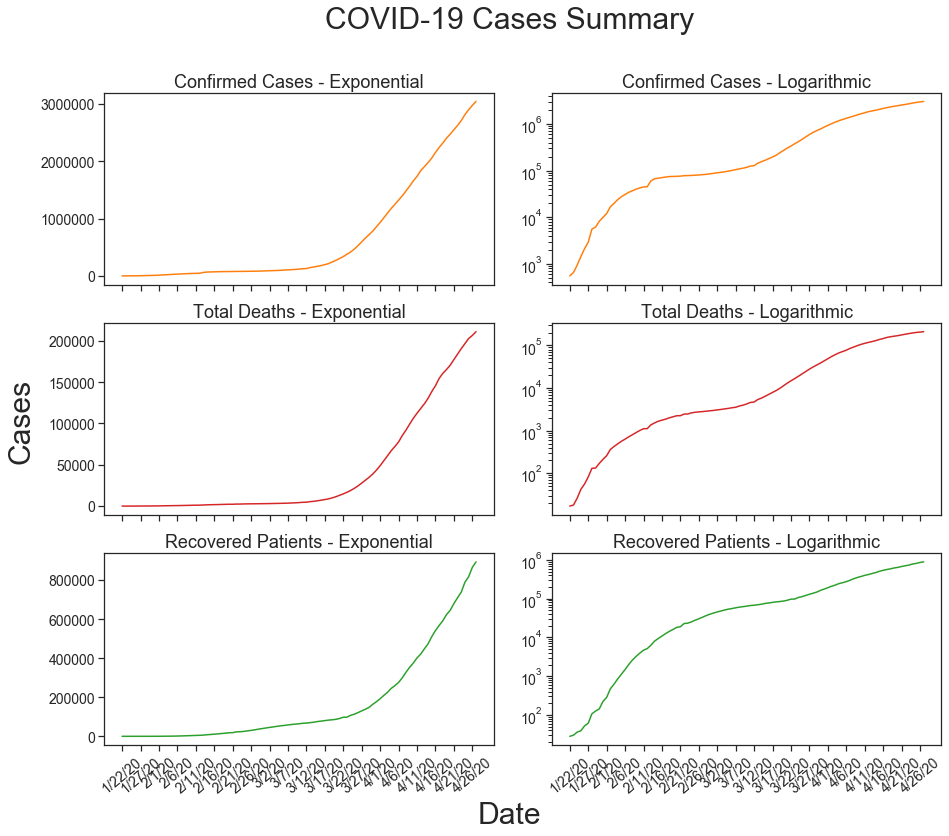

In [4]:
# create a list of x tick labels
x_ticks = []
i=0
for col in df:
    if(i%5 == 0):
        x_ticks.append(col)
    i = i +1

# initialise the figure    
fig, axs = plt.subplots(3, 2, figsize = (15,12), sharex='col',
                        gridspec_kw={'hspace': 0.2, 'wspace': 0.15})
(ax1, ax2), (ax3, ax4), (ax5, ax6) = axs

# plot the subplots
ax1.plot(df.columns, df.sum(), 'tab:orange')
ax2.plot(df.columns, df.sum(), 'tab:orange')
ax3.plot(df2.columns, df2.sum(), 'tab:red')
ax4.plot(df2.columns, df2.sum(), 'tab:red')
ax5.plot(df3.columns, df3.sum(), 'tab:green')
ax6.plot(df3.columns, df3.sum(), 'tab:green')

# add titles 
fig.suptitle('COVID-19 Cases Summary', fontsize = 30)
ax1.set(title = "Confirmed Cases - Exponential")
ax2.set(title = "Confirmed Cases - Logarithmic", yscale= "log")
ax3.set(title = "Total Deaths - Exponential")
ax4.set(title = "Total Deaths - Logarithmic", yscale= "log")
ax5.set(title = "Recovered Patients - Exponential")
ax6.set(title = "Recovered Patients - Logarithmic", yscale= "log")

# set the size of the plots
ax1.title.set_size(18)
ax2.title.set_size(18)
ax3.title.set_size(18)
ax4.title.set_size(18)
ax5.title.set_size(18)
ax6.title.set_size(18)

# add the tick labels 
for ax in axs.flat:
    ax.set_xticks(x_ticks)
    ax.tick_params('x', rotation = 40)
    ax.tick_params('y', labelsize ='large')
    for tick in ax.xaxis.get_major_ticks():
        tick.label.set_fontsize(14) 
    for tick in ax.yaxis.get_major_ticks():
        tick.label.set_fontsize(14) 

# add two main axis labels 
fig.text(0.035, 0.5, "Cases", verticalalignment="center", rotation = 90, fontsize = 30);
fig.text(0.5, 0.035, "Date", horizontalalignment="center", rotation = 0, fontsize = 30);

#### Matrix Plot of Government Indicators

The matrix plot shows the correlation between selected government indicators. This plot was designed as part of the exploratory data stages of the project. The purpose of this visualisation was to show the correlation between different government indicators to then assist with the design of the final visualisations. The visualisation helped identify government indicators that might be interesting to compare and visualise in conjunction with the other three datasets. 

In [5]:
# load in the dataset
data = pd.read_csv("worldbank_and_press_freedom.csv",index_col=0)

# remove the relevant indicators from the dataset and store in a new dataframe
indicator_data = data[["gdp_per_capita", "universal_healthcare_coverage_index", "hospital_beds_per_1000", "physicians_per_1000", "health_expenditure_per_capita", "government_effectiveness", "political_stability"]]

# set the column labels
indicator_labels = ['GDP', 'Healthcare Index', 'Hospital Beds', 'Doctors', 'Health Expenses', 'Gov. Effectiveness', 'Political Stability']
indicator_data.columns = indicator_labels

# set the output plot style
sns.set_style("white")

In [ ]:
# plot the data
grid = sns.pairplot(indicator_data, 
             plot_kws = {'alpha': 0.6, 's': 100, 'edgecolor': 'k'},
             height = 5);

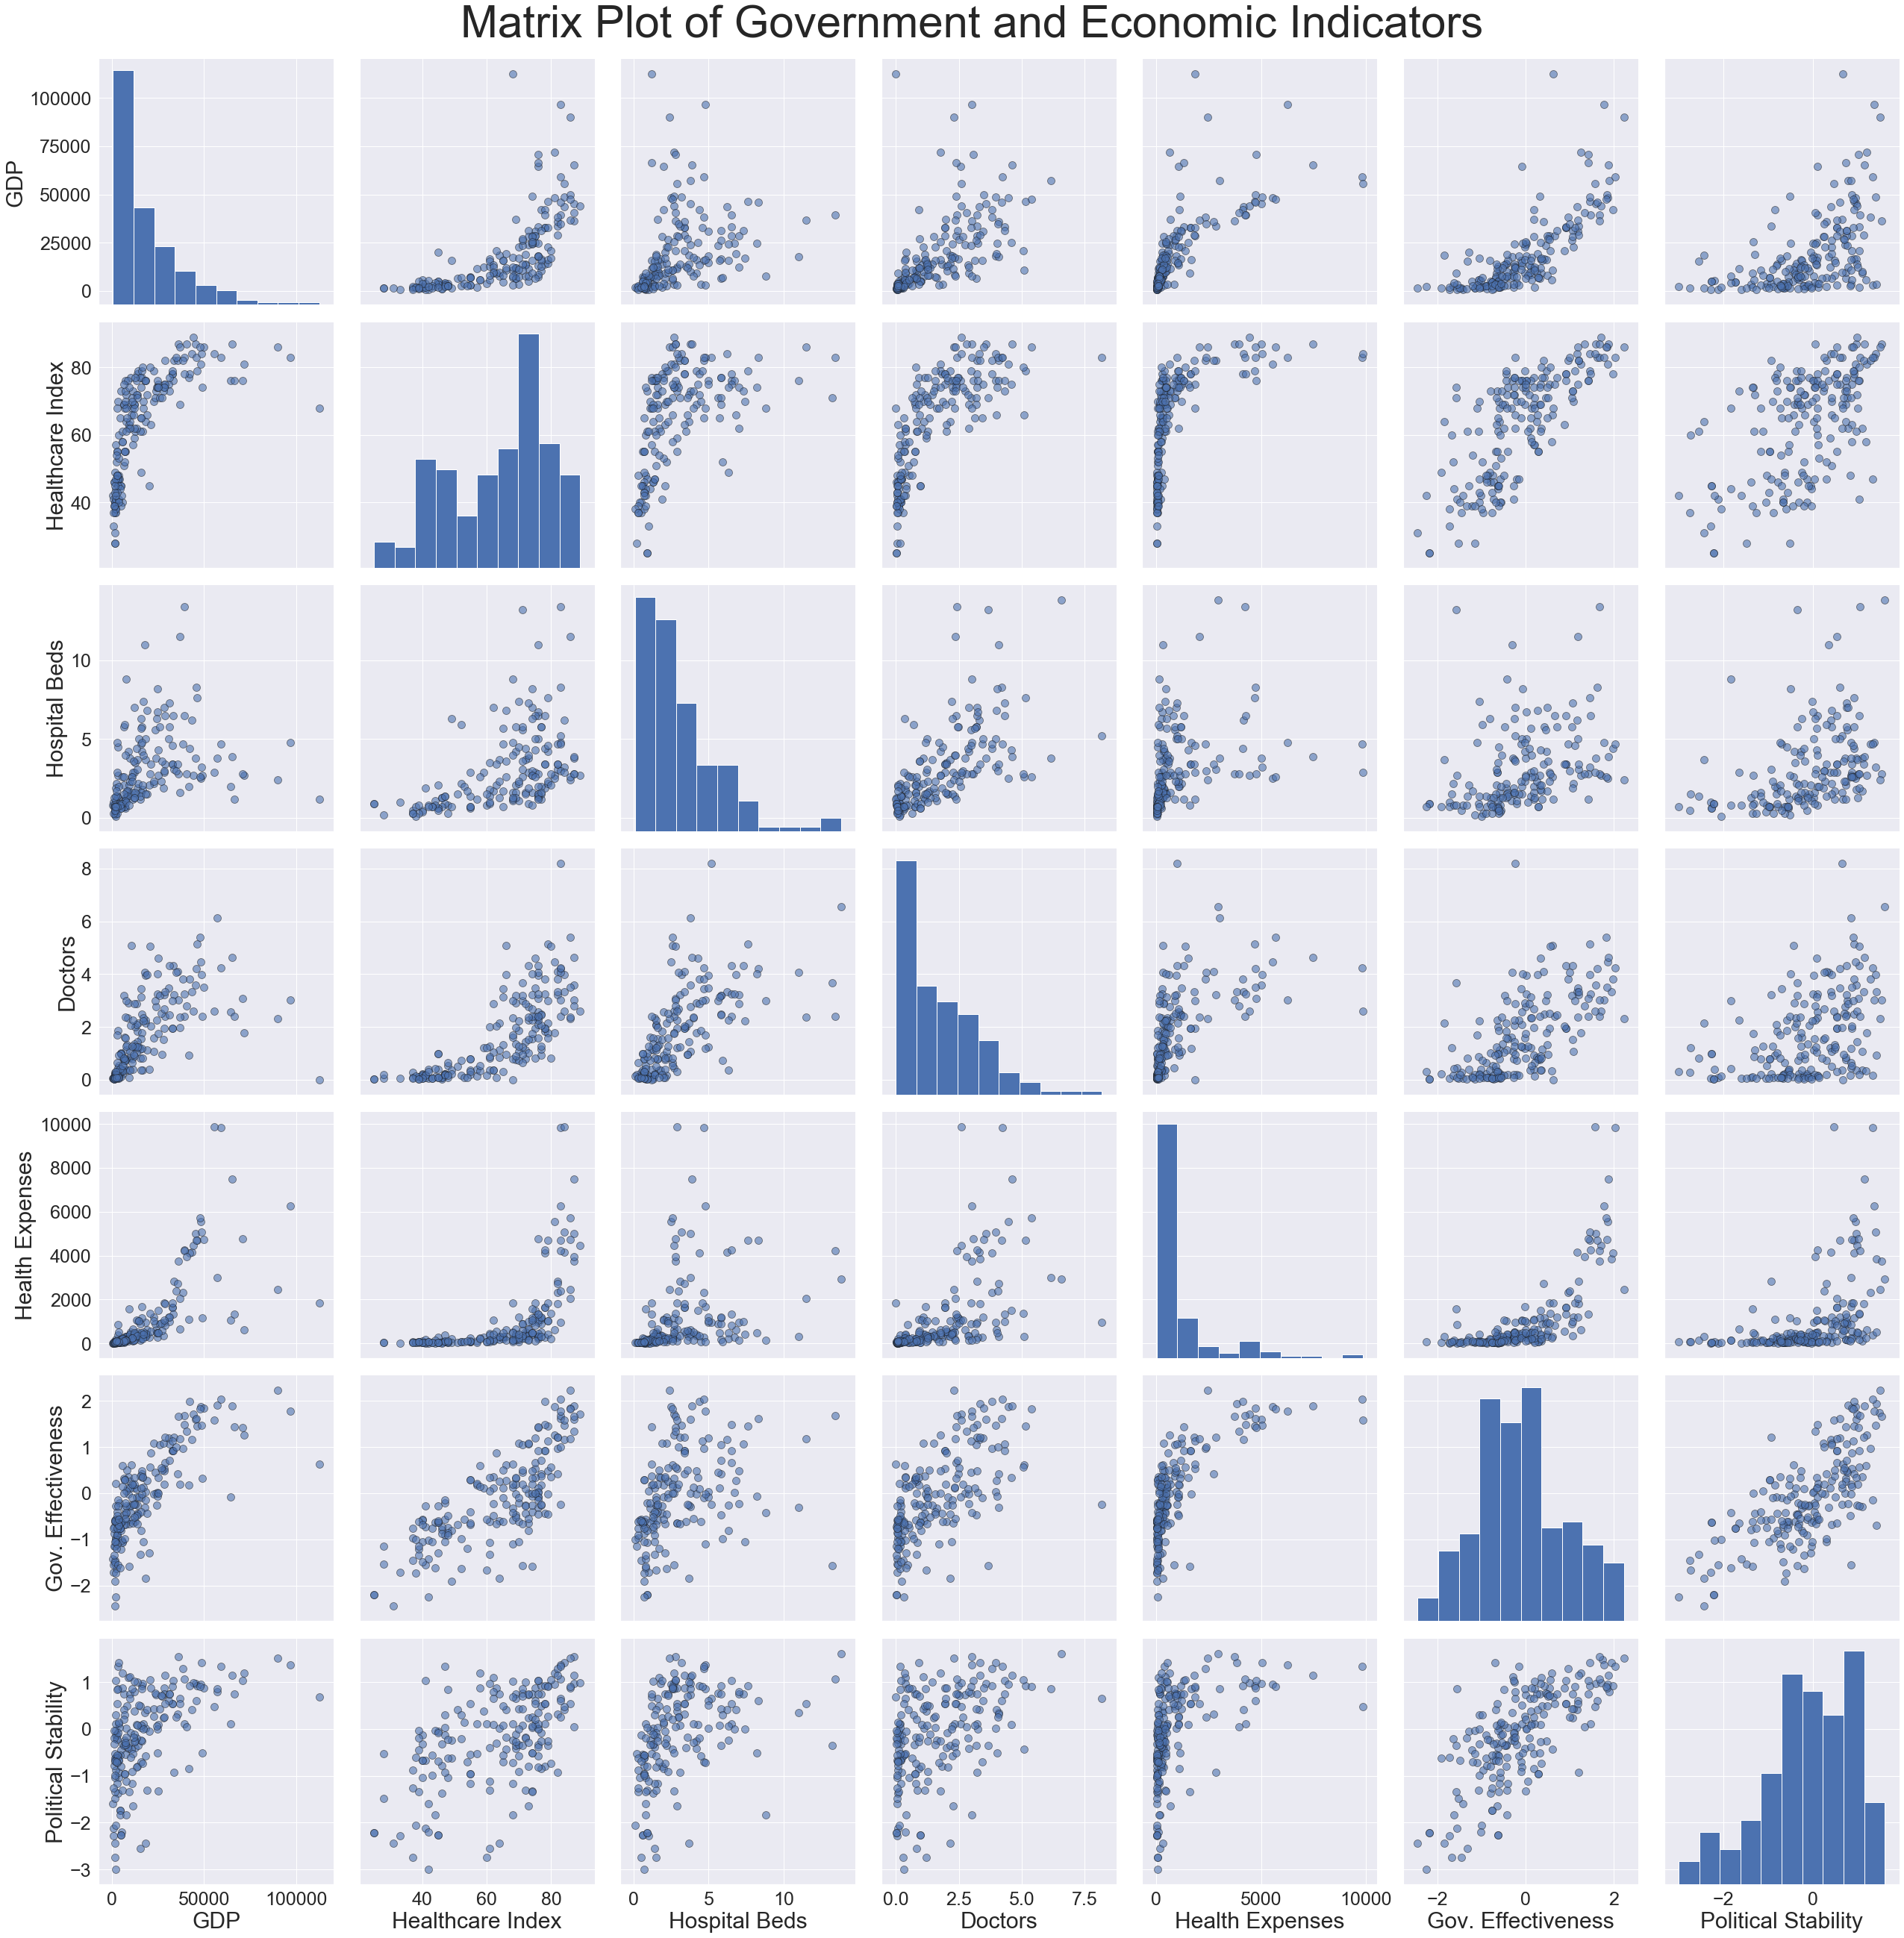

In [7]:
# set the font sizes
rc={'font.size': 30, 'axes.labelsize': 30, 'legend.fontsize': 20, 
    'axes.titlesize': 30, 'xtick.labelsize': 25, 'ytick.labelsize': 25}  
sns.set(rc)

# add a title to the plot
grid.fig.suptitle("Matrix Plot of Government and Economic Indicators", y=1.025,  fontsize=60);

#### Heat Map Movie Plot

The heat map movie plot was also designed as part of the exploratory data stages of the project. The purpose of this visualisation was to allow us to visualise the spatial elements of our datasets and to see the evolution of the coronavirus from Asia through to Europe and finally America. We intended to use this visualisation in the introductory part of our website. However, we noticed a few gaps within the datasets that meant the visualisation did not appear as we initially thought. For all countries, the number of coronavirus cases is spread throughout many different cities in different locations. We thought this was a strength of the dataset as it presented the number of cases in a particular country spread throughout different cities. For example, for Australia, there were multiple locations with lat and long coordinates and number of cases. Therefore, when visualised in a heat map, there are various points within Australia. The same is seen for China and many other countries until we get to America. Confusingly, only one data point and lat/long location were included for America. When we visualised the heat map, we quickly realised that this was quite misleading, given that for many other countries, there were multiple points. Therefore, as the dataset limited us in what we could visualise, we moved towards a choropleth map and just showed the data by country. However, the heat map was still an essential part of our basic statistics summary, and therefore, we have included it here instead. 

In [10]:
# load in the dataset
lat_lon_confirmed = pd.read_csv("lat_lon_confirmed.csv", index_col = 0)

# reset the index
lat_lon_confirmed = lat_lon_confirmed.reset_index()

In [11]:
# create a list of lists required as an input for the heat map movie function

# initialise an empty list
listoflists = [] 

# loop over all of the dataset
for col in lat_lon_confirmed.iloc[:,2:].iteritems():
    col = col[1]
    
    # create a sublist
    sublist = []
    
    # loop over each row in the column
    for index,row in enumerate(col):
        long = lat_lon_confirmed.Long.iloc[index]
        lat = lat_lon_confirmed.Lat.iloc[index]
        
        # if the weight of the row variable is zero, this means there are no cases at that 
        # particular location and date, therefore, they should not be included in the list of lists
        weight = row
        if weight == 0:
            continue
            
        # add the list to a sublist
        point = [lat,long,weight]
        sublist.append(point)
        
    # add the sublist to the main list     
    listoflists.append(sublist)

In [12]:
# plot the map
mapmovie = folium.Map(location=[0, 0], zoom_start=1.75, tiles = "Stamen Toner", width = 900, height = 500)

# add the heat map with time
HeatMapWithTime(listoflists).add_to(mapmovie)

# show the movie
mapmovie

## 3. Data Analysis

### Describe your data analysis and explain what you've learned about the dataset.
The below section briefly discusses the data analysis conducted for each visualization presented on the website. For more specific analysis and too see where different parts of the analysis have been implemented, please see the notebook with the main code. For information about the trends identified and the information learnt about the dataset from the visualizations, please see the website or the main code notebook which also contains all of the text for the website. 

#### Heat Map Movie (not included in final website)
For this visualization, the principal data analysis that was required included compiling the list of lists necessary to plot the heat map movie. The heat map movie plots a point at the latitude and longitude location even if the value is zero. Therefore, as part of the creation of the list of lists, zero weighting values were left out by using and if statement. 

#### Website Visualisation 1: Slider Plot
The slider plot requires a bit of data manipulation before ready to be visualized on the map. A choropleth map should express a form of normalized data such regions, or in our case countries, can be compared.  The dataset with the population was represented by 201 countries, whereas the COVID-19 dataset had 210 countries. Oddly enough, the population dataset also consisted of five duplicate rows that needed to be removed. To get the overlapping parts from both sets, we took the intersection between the list of country codes and was left with 180 countries. The last step was to divide the number of cases by population. 

#### Website Visualisation 2: Summary Statistics
The summary statistics visualizations required minimal data analysis. This visualization was a great starting point for the project as it was simple to construct yet revealed lots of information about the cases dataset. The little data analysis that did need to be completed included the summation of the number of cases for each date within the dataset. This allowed the visualization to show the cumulation of COVID-19 cases over time. 

#### Website Visualization 3: Pandemic Curve Plot
Due to a large number of countries in the datasets, for the pandemic curve plot, only specific focus countries were analyzed. These included Australia, China, Denmark, France, India, Iran, Italy, Mexico, Sweden and the USA. As part of the data analysis for this visualization, the data was filtered to only include these specific countries. To see the true shape of the pandemic curve, only the number of active cases per day is visualized. Currently, the dataset in its original format is cumulative, which, is not suitable if we only want to show the number of active cases per day. Therefore, the deaths and recovered datasets need to be subtracted from the cases dataset. To allow for a fair comparison between the countries, the number of active coronavirus cases per day was divided by the population size from the world bank indicators dataset. Using the bokeh package and looping through each focus country, the pandemic curve was plotted. 

#### Website Visualization 4: Government Measures
For this visualization, the main data analysis that was necessary was to determine when the pandemic "started" in each country, to then determine the time elapsed between the outbreak and when governments implemented the various measures in their country. To do so, we considered the start of the epidemic in a given country to be the date in which the number of cases in that country surpassed 50. While arbitrary, this cutoff was found to be an excellent way to avoid noise.

#### Website Visualization 5: Healthcare Expenditure
To see how the healthcare expenditure and GDP per capita related to the number of cases per capita in a given country, we fit two regression lines to the two indicators mentioned above. Those had an R2 value of 0.56 for the correlation between GDP and Cases per capita, and of 0.44 for Healthcare Expenditure and cases per capita, indicating a likely link in both cases. Surprisingly enough, higher GDP and higher healthcare expenses correlate with a higher number of cases. We also did multiple regression using both GDP and Healthcare Expenditure, which gave an R2 of 0.60 - indicating that the two indicators together are a better predictor of the number of cases than taken separately.

#### Website Visualization 6: Healthcare System
In this plot, we wanted to see how the type and capacity of countries' healthcare systems related to how long it took governments to implement strong coronavirus policies. Similar to visualization 5, we had to compute the timings between the outbreak and the date at which the country had a stringency index of >50%, as per the Oxford Dataset.

#### Website Visualisation 7: Political State
These visualizations aimed to look at how various political indicators influenced the evolution of the pandemic.
For the first part, we looked at nine different indicators, and for various ranges of the values that those indicators could take, looked at what proportion of the countries had reached a peak in the pandemic (i.e. managed to get the spread under control).

Some interesting points are to be noted here:

- Some of the trends were to be expected: for instance, the proportion of countries that managed to control the epidemic is greater for countries whose "Government effectiveness" and "Rule of law" are high.
- Likewise, the fact that the countries where a high percentage of healthcare costs have to be covered by individuals have a lower success rate is also quite understandable. If people must pay for their own treatment, they might be more reticent to get tested, have treatment in a hospital, etc.
- On the other hand, some trends are quite surprising and interesting: "Voice and Accountability" (which is a measure of democracy) has two peaks on both sides of the spectrum. Our interpretation is that countries with strong, totalitarian governments (the peak on the left of the graph), where a citizen has little choice but to obey the government's decisions, are better able to react swiftly to a crisis like this than weak democracies (the valley in the middle of the graph). On the other hand, strong democracies (the peak on the right of the graph) mostly correspond to wealthy European countries, which are better able to face the crisis due to many other reasons.

#### Website Visualization 8: Stringency Measures Slider Plot
The stringency dataset required initial processing before analysis was to be done. The same preparation is needed as in Visualization 9 and 10, and a more detailed explanation is listed there. Further, this visualization needed a geojson file mapping each country to its respective polygon expressed in lat and long. 

#### Website Visualization 9: Stringency and Number of Coronavirus Cases
The oxford stringency dataset required significant data analysis to manipulate the dataset into the necessary form for visualization. Initially, the dataset listed the stringency index per day per country as individual rows within the dataset. This resulted in a very long dataset. Some countries also did not have complete data for the date range 01/01/2020 to the 24/04/2020. These countries were removed before the dataset was manipulated to have the countries along with the y index of the dataset and the date along with the top index. This allowed for the data to be presented as a large matrix and is easier to plot. The last row of the dataset, however, consisted of NaN values. This country, however, did not have data for the entire date range, so it was okay to remove it. To ensure consistency between the stringency and number of coronavirus cases dataset, the stringency dataset was limited to the dates in the coronavirus dataset. Both datasets were converted to date-time objects. We are only interested in the maximum number of cases and stringency index. Therefore, the maximum of each dataset for each country was removed from the dataset and placed in a new data frame. The data was then plotted and a regression line added to show the general trend between stringency and number of coronavirus cases. 

#### Website Visualization 10: Epidemic Curve and Stringency Measures
The epidemic and stringency measures plot relies on the data analysis conducted for the above visualization. However, further data analysis was also undertaken to remove the focus countries from the dataset for this visualization. Each different focus country was then plotted in its own subplot. 

## 4. Genre

> Which tools did you use from each of the 3 categories of Visual Narrative (Figure 7 in Segal and Heer). Why?
> Which tools did you use from each of the 3 categories of Narrative Structure (Figure 7 in Segal and Heer). Why?

As previously mentioned our three key elements throughout the story was overview, zoom and filter, and details on demand. The webpage consists of 10 visualisations that all contribute to the main narrative of the story, but also each plot has thought out narrative in isolation, and some also in groups of isolation. Therefore the webpage can be categorised with many different elements of both the categories from visual narratives as well as narrative structure. 

#### Visual Narrative
For the category visual structuring, we used a **timebar/slider**; this was so to let the user determine the pace of the presentation in the choropleth maps. In our interactive plots, we ensured a **consistent visual platform** so as not to overwhelm the user with too many changes. It can be argued that the choropleth map combined with summary statistics provides an **establishing shot** so to give a clear introduction and overview to the user. In the interactive bubble-plots, we focused on tools as **zooming** and **feature distinction** by size- and colour- selection. This is done to guide the attention of the user. Feature distinction is also applied in the interactive bar-plot.

#### Narrative Structure
The webpage has an ordering of **User Directed Path** which is natural for a webpage. For the interactivity, we applied tools such as **hover highlighting**, **filtering/selection** and **navigation buttons** in the form of a slider. The main focus has been developing a webpage with high interactivity providing the user freedom to explore and find their own insights. By combining this freedom with guidance in the form of information when hovering and ability to select specific countries etc.. we aim to achieve constructing a story the user feels more connected to, as well as in control. Throughout the tools applied have all been thought to be user friendly and very easy to use.

## 5. Visualisations

### Explain the visualisations you've chosen. Why are they right for the story you want to tell?

#### Heat Map Movie (not included in final website)
Before we can continue with the analysis, we must first look at the government measures that have been introduced and the timing of their introduction. After exploring the lockdown measures and the timing of their introduction, it is then interesting to begin to explore the reasoning behind these measures. Governments worldwide have introduced totalitarian social distancing and lockdown laws to curb the spread of the virus. Utilising the coronavirus data, it is interesting to visualisation the number of coronavirus cases and days since the confirmation of the first case before the government went into lockdown. This visualisation is designed to show audiences the variation in lockdown measures and the timing of their introduction. It is intended to show the variation of the government responses to provoke thought and lead on to further visualisations where the reasons for the government actions and timings are explored. 

#### Website Visualisation 1: Slider Plot
The slider plot is meant to provide the user with a worldwide overview of the Covid-19 situation. It is highly interactive, so the user may explore the data with freedom. The slider introduces trends and temporal patterns as the user may speed through the evolution at the chosen pace. Information of how many cases in a country at chosen date is shown when the user hovers his mouse on top of a country in question, as well as a number of recovered and deaths. Further on it stands in style to our general narrative of starting broad and getting more specific as the story evolves. This visualisation is a reader-driven experience which has the structure of an **interactive slideshow** that uses **single-frame interactivity**. *-REF article* 

#### Website Visualisation 2: Summary Statistics
The summary statistics plot falls under the introductory section of the website. The summary statistics plot is designed to show the overall spread of the virus and demonstrate to each user the exponential spread of the virus. The visualisation is static and author-driven. It falls under the annotated chart visualisation genre. This visualisation is an excellent introduction to the topic as it is simple, requires minimal audience participation and is easy to understand. 

#### Website Visualisation 3: Pandemic Curve Plot
The pandemic curve plot shows where different countries are in terms of the stage of the pandemic. The plot zooms in to the data and displays the pandemic curve for a selected group of countries. The visualisation is interactive and allows for comparisons between countries to be easily made. The visualisation is in the annotated chart visualisation genre and is audience-driven. It requires audiences to engage with the visualisation and select countries to visualise. This visualisation forms part f the introduction to the topic. It introduces audiences to the pandemic curve but also makes a clear point that not every country has been as severely affected in terms of the number of cases. It also demonstrates how many countries have "flattened the curve" and leads on to further visualisations where we explore the government measures before bringing everything together and showing how the government measures have affected the pandemic curve. 

#### Website Visualisation 4: Government Measures
Governments worldwide have introduced drastic social distancing and lockdown laws to curb the spread of the Coronavirus. This visualisation aims to look at the speed of reaction of different governments. A scatterplot style was be used to visualise this information, where the X-axis represents the number of days that have passed between the first case in a country and the introduction of the measure, and the Y-axis represents the number of cases in the country on the day that the action was introduced. On hovering over the bubble of an individual country, information about the lockdown measure introduced is revealed. This visualisation follows the annotated chart style, with interactive elements. This visualisation is designed to show audiences the variation in lockdown measures and the timing of their introduction. It is intended to show the variation of the government responses to provoke thought and lead on to further visualisations where the reasons for the government actions and timings are explored.  

#### Website Visualisation 5: Healthcare Expenditure
The first question is to see how fundamental economic indicators, GDP and healthcare expenditure, influenced the number of cases of Coronavirus. This visualisation is designed as an introduction to the key parameters relating to the coronavirus pandemic, government and economic data. This visualisation falls under the annotated chart genre. It is a static visualisation that is primarily author-driven. However, the user does have the option to view details on demand by hovering over each country. 

#### Website Visualisation 6: Healthcare System
After exploring the lockdown measures and the timing of their introduction, it is then interesting to begin to explore the reasoning behind these measures. A crucial part of this investigation is investigating how the quality of the healthcare system has influenced government measures. Questions like have some countries been quicker to introduce strong measures because they don't have the health system capacity, are interesting to explore. A bubble plot displays the speed of reaction (i.e. number of days after the first case before the country had a high stringency score according to the Oxford dataset) compared to the universal healthcare coverage index and the capacity of the healthcare system classified by the number of hospital beds. Other information, including the number of healthcare personnel, is provided as an interactive element to the plot. This visualisation is a static visualisation and falls under the annotated chart style; however, it does include interactive features. The visualisation is designed to show how the capacity of the healthcare systems has influenced government decisions during the pandemic.

#### Website Visualisation 7: Political State
A visualisation analysing the political system of each country and how this has affected the spread of the Coronavirus is also interesting to explore. Measures, including government effectiveness and political stability, have been taken from the world bank's data archives. We then compared the rates of success in curbing the pandemic (i.e., whether or not the epidemic curve reached a peak) for different values of the indicators.

<!-- It is interesting to explore how the stability and effectiveness of the government have impacted the rate of the coronavirus spread.  -->

<!-- This will be shown in a scatter plot style visualisation. The visualisation is static, author-driven and falls under the annotated chart visualisation genre. -->

#### Website Visualisation 8: Stringency Measures Slider Plot
In similarity to how the previous slider choropleth map gave an overview over Covid-19 data and gave the user freedom to initially explore on its own this plot does the same. Its purpose is to provide the user with freedom to explore on his own, either a specific picture of the current standing in a chosen country or observing temporal trends over larger regions. This visualisation is a reader-driven experience which has the structure of an **interactive slideshow** that uses **single-frame interactivity**. Also, it's colour usage is similar to the other slider map to achieve a **consistent visual platform**. 

#### Website Visualisation 9: Stringency and Number of Coronavirus Cases
The stringency and number of coronavirus cases visualisation begin to bring together all of the information presented on the website. It shows the maximum number of cases and the maximum stringency number and their trend for all countries worldwide. It demonstrates to users how different stringency numbers have affected the number of coronavirus cases. The visualisation is static and author-driven however, users can hover over points to reveal information about the country and extract numerical details. The visualisation follows the annotated chart visualisation genre. This visualisation is important to start bringing all of the information together. 

#### Website Visualisation 10: Epidemic Curve and Stringency Measures
The final visualisation, shows how the stringency number, which is reflective of the government measures, has had an impact on the pandemic curve. The visualisation only looks at the focus countries. It falls under the annotated chart genre and is author-driven. The visualisation makes it clear to the users the trends. The accompanying text also assists users in understanding. Users have already been engaging with visualisations throughout the website, and the amount of information that has been retained by users varies. Therefore, this form of visualisation ensures that the trends are clearly explained no matter the amount of information that has been retained. 

## 6. Discussion

#### What went well?
Throughout the project, collaboration and team meetings were effective ways of completing the project. Weekly meetings allowed for discussion and identification of areas that weren't working well or maybe required further attention. The meetings were a great opportunity to discuss progress but also seek advice and assistance from another team member about data analysis and visualisations that were not quite working as expected. 

Planning visualisations in advance was a great way to structure the project. By having a clear end goal, this made the coding much easier as we could focus on the technical elements rather than trying to be creative and code at the same time. 

From data analysis and visualisation perspective, the website could be seen as a preliminary report that identifies some interesting, and sometimes unexpected, trends. Utilising packages like bokeh enabled us to create visually attractive plots but also to easily make them interactive and include details on demand. 

#### What is still missing? What could be improved? Why?
The analysis of how different indicators influence both the epidemic and government responses to the pandemic has so many elements. What we have presented is an overview of the different factors and have analysed many individuals and their impact on the pandemic. It would be interesting now, as an extension to this project, to gain insight into how different factors influence each other. However, this is more of an economic project rather than one focusing on the pandemic. We have identified that countries with totalitarian regimes were often better at facing the epidemic than "weak" democracies. Still, it would be very interesting to see what other factors come into play.

## 7. Code
To view the source code for the website which contains all of the final visualisations, please see the additional code notebook.

## 8. Contributions

| Project Element | s196573 (Bethany) | s200237 (Luca) | s196642 (Jakob) |
| --- | --- | --- | --- |
| Development of Idea | 33.3% | 33.3% | 33.3% |
| Data Collection | 10% | 80% | 10% |
| Data Cleaning and Reduction | 10% | 80% | 10% |
| Initial Data Explanations | 80% | 10% | 10% |
| Visualisation Planning | 60% | 20% | 20% |
| Project Part A: Video | 80% | 10% | 10% |
| Data Manipulation | 33.3% | 33.3% | 33.3% |
| Visualisation: Heat Map Movie | 60% | 30% | 10% |
| Website Visualisation 1: Slider Plot | 10% | 10% | 80% |
| Website Visualisation 2: Summary Statistics| 30% | 10% | 60% |
| Website Visualisation 3: Pandemic Curve Plot| 60% | 30% | 10% |
| Website Visualisation 4: Government Measures| 10% | 80% | 10% |
| Website Visualisation 5: Healthcare Expenditure| 10% | 80% | 10% |
| Website Visualisation 6: Healthcare System| 10% | 80% | 10% |
| Website Visualisation 7: Political State| 10% | 80% | 10% |
| Website Visualisation 8: Stringency Measures Plot| 10% | 10% | 80% |
| Website Visualisation 9: Stringency and Number of Coronavirus Cases| 80% | 10% | 10% |
| Website Visualisation 10: Epidemic Curve and Stringency Measures| 80% | 10% | 10% |
| Creation of Website | 10% | 80% | 10% |
| Explanations for Website | 33.3% | 33.3% | 33.3% |
| Explainer Notebook | 40% | 30% | 30% |
| Final Editing | 80% | 10% | 10% |